# Finding the Best Markets to Advertise In

We're working for an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game developmen, etc.

The company want to invest some money in advertisement in order to promote their product, so our goal in this project is to find out the two best markets to advertise the product in.

## Understanding the Data

To reach our goal, we can act in some different ways, for example we could organize surveys for a couple of different markets to find out which is the best choice. However this might be very costly, and we prefer to explore cheaper options first.

We can look for for existing data that might be relevant for our purpose. A valid candidate seems to be the [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular publication (over 400k followers), they cover new coders with varying interests, not only web development, which is ideal for the purpose of our analysis. This choice seems to be right fo us.

The data set is available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

Let's start to read in the file and explore briefly the data set.

In [1]:
#Importing the library
import pandas as pd

#Reading the data set
fcc_survey = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory = False)

#Displaying the data
print(fcc_survey.shape)
pd.options.display.max_columns = 150
fcc_survey.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

## Checking for Sample Representativity

We want to answer questions about a population of new coders that are interested in the subject we teach, remembering that we offer courses on web and mobile development, but we also cover other domains, like data science, game development, etc. We'd like to know:

* Where are these new coders located
* What are the locations with the greatest number of new coders
* How much money new coders are willing to spend on learning.

We want to analyze the sample data, but first of all we have to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

In [2]:
#Generating the frequency table
fcc_survey["JobRoleInterest"].value_counts(normalize = True)*100

Full-Stack Web Developer                                                                                                                                                                       11.770595
  Front-End Web Developer                                                                                                                                                                       6.435927
  Data Scientist                                                                                                                                                                                2.173913
Back-End Web Developer                                                                                                                                                                          2.030892
  Mobile Developer                                                                                                                                                                              1.67

From the table above we can make some considerations:

* A lot of people are interested in web development (full-stack web development, front-end web development and back-end web development.
* Few people are interested in mobile development.
* Few people are interested in other domains than web and mobile development.

We can also note that many respondents are interested in more than one subject. So let's generate a frequency table to have a view of how much people have an only main interest and how many have mixed interests.

In [3]:
#Splitting each string
interests = fcc_survey["JobRoleInterest"].dropna()
splitted = interests.str.split(",")

#Creating the frequency table
n_options = splitted.apply(lambda x: len(x))
n_options.value_counts(normalize=True).sort_index()*100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

The most common number of options is 1, with a percentage of the 31.65%, that means the majority of the people have more than one interest and this could be a good new for our purpose. The focus of our project is on web and mobile development, so we'll analyze how many people are interested in at least oneof these two subjects.

([<matplotlib.axis.XTick at 0x243478a7448>,
 <a list of 2 Text xticklabel objects>)

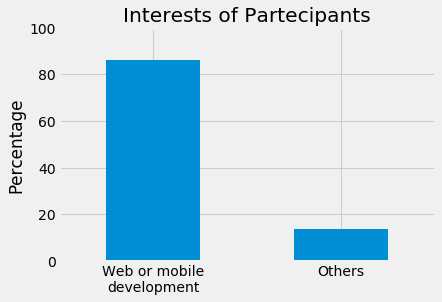

In [4]:
#Finding percentage of people interested in web or mobile development
web_mobile = interests.str.contains("Web Developer|Mobile Developer")
freq_table = web_mobile.value_counts(normalize=True) * 100

#Importing the library
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Plotting the result
freq_table.plot.bar(title = "Interests of Partecipants", rot = 0)
plt.ylim([0, 100])
plt.ylabel("Percentage")
plt.xticks([0, 1],["Web or mobile\ndevelopment", "Others"])

More than 86% of people in the sample are interested in web or mobile development, therefore we can say with good confidence that this sample is representative of our population of interest. Now we'll try to understand what are the best markets to invest the money in for advertising our courses.

## New Coders - Locations and Densities

We can start with finding out there the new coders are located, and what are the densities for each location. The data set provide some information about location:

* The column *CountryCitizen* describes the country of origin of each partecipant.
* The column *CountryLive* descirbes the country each partecipants lives in.

For our analysis we'll work with the *CountryLive* variable because we're interested where people actually live at the moment when we run the ads. We want to find out the two best countries to advertise in knowning that one important indicator of a good market is the number of potential customers.

In [5]:
#Isolating the relevant partecipants 
sample = fcc_survey[fcc_survey["JobRoleInterest"].notnull()].copy()

#Frequency tables with absolute and relative frequencies
absolute = sample["CountryLive"].value_counts()
relative = sample["CountryLive"].value_counts(normalize=True)

#Creating the dataframe with the results
pd.DataFrame(data = {"Absolute frequency" : absolute, "Percentage" : relative * 100})

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Kyrgyzstan,1,0.014624
Vanuatu,1,0.014624
Bolivia,1,0.014624
Trinidad & Tobago,1,0.014624


United States of America seems to be by far the best market to invest in, with the 45.7% of the total new coders. India is in the second place but with its 7.7% is not far from UK (4.6%) or Canada(3.8%), so we have to investigate more in depth. In particular we want to invest in the countries where people are willing to spending the most on learning. 

## Spending Money for Learning

We need to go more in depth before taking a decision. The *MoneyForLearning* column describes in American dollars how much money each partecipant spent from the moment they started coding until the moment they completed the survey, clearly we are interested in finding out how much money each student spends per month.

We'll analyze the top 4 countries ( US, India, UK, Canada) for two reasons:

* These are the countries with the highest frequencies in our sample.
* English is an official language in all these four countries, and our courses are written in English.

In [6]:
#Avoiding division by 0
sample["MonthsProgramming"].replace(0, 1, inplace=True)

#Creating the column weare interested in
sample["MoneyPerMonth"] = sample["MoneyForLearning"] / sample["MonthsProgramming"]

#Finding out the number of null values
sample["MoneyPerMonth"].isnull().sum()

675

Let's clean further the data.

In [7]:
#Removing the null values
sample = sample[sample["MoneyPerMonth"].notnull()]
sample = sample[sample["CountryLive"].notnull()]

#Grouping the dataframe
countries_mean = sample.groupby(sample["CountryLive"]).mean()
countries_mean["MoneyPerMonth"][["United States of America", "India", "Canada", "United Kingdom"]]

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: MoneyPerMonth, dtype: float64

The results confirm that USA are the best choice, but we are a little surprised by the results of India, Canada and UK: for socio-economical reasons we would expect people in UK and Canada to spend much more than people in India. 

Maybe we don't have representive data for UK and Canada or there are some big outliers, or the results might be correct, we have to analyze more in depth.

## Dealing with Extreme Outliers

Let's generate the box plots for each countries that describes the distribution of the variable that describes how much money each partecipant had spent for month. If we'll find some extreme outliers we'll handle them to obtain much relevant results.

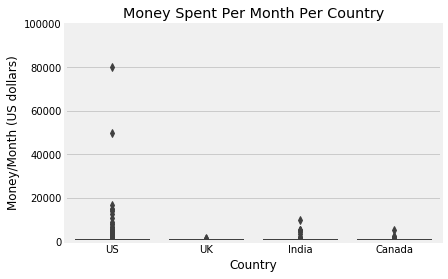

In [8]:
#Isolating the top 4 countries
top_4 = sample[sample['CountryLive'].str.contains(
    "United States of America|India|United Kingdom|Canada")]

#Plotting the results
import seaborn as sns
sns.boxplot(x="CountryLive", y="MoneyPerMonth", data = top_4)
plt.title("Money Spent Per Month Per Country")
plt.xticks([0,1,2,3],["US", "UK", "India", "Canada"])
plt.xlabel("Country")
plt.ylabel('Money/Month (US dollars)')
plt.ylim(0, 100000)
plt.show()

From the plot above we can't see any good information about UK, India and Canada but we can note two extremely big outliers in the US market. It seems very unlikely that someone would spend 50.000\$ / month or more, so we'll remove every value that goes over 20.000\$.

In [9]:
#Removing the outliers in the US
sample = sample[sample["MoneyPerMonth"] < 20000]

Now let's compute again the mean values.

In [10]:
#Grouping the dataframe
countries_mean = sample.groupby(sample["CountryLive"]).mean()
countries_mean["MoneyPerMonth"][["United States of America", "India", "Canada", "United Kingdom"]]

CountryLive
United States of America    183.800110
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: MoneyPerMonth, dtype: float64

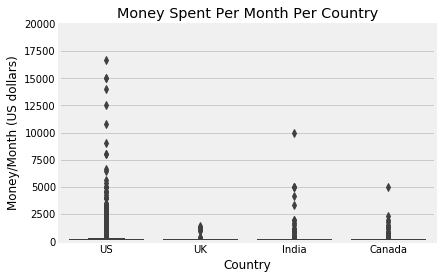

In [11]:
#Isolating the top 4 countries
top_4 = sample[sample['CountryLive'].str.contains(
    "United States of America|India|United Kingdom|Canada")]

#Plotting the results
sns.boxplot(x="CountryLive", y="MoneyPerMonth", data = top_4)
plt.title("Money Spent Per Month Per Country")
plt.xticks([0,1,2,3],["US", "UK", "India", "Canada"])
plt.xlabel("Country")
plt.ylabel('Money/Month (US dollars)')
plt.ylim(0, 20000)
plt.show()

Now we can visualize some big outliers in India as well, we'll analyze deeply these partecipants in order to have more informations. 

In [12]:
#Finding out the outliers in India
india_outliers = top_4[(top_4["CountryLive"] == "India") & (top_4["MoneyPerMonth"] > 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,

These six partecipants didn't attended any bootcamp, which might justify the large amount of money spent, so we'll remove these outliers.

In [13]:
#Removing the Indian outliers
top_4 = top_4.drop(india_outliers.index)

Now let's investigate about the US and Canadian outliers. We'll remove the partecipants which have spent a lot of money per month without having attended a bootcamp.

In [14]:
#Finding the outliers in US
us_outliers = top_4[(top_4["CountryLive"] == "United States of America") & (top_4["MoneyPerMonth"] > 5000)]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
#Remove the unjustified outliers 
top_4 = top_4.drop(us_outliers[us_outliers["AttendedBootcamp"] == 0].index)

#Finding the outliers in Canada
canada_outliers = top_4[(top_4["CountryLive"] == "Canada") & (top_4["MoneyPerMonth"] > 4000)]
canada_outliers

We'll not remove the Canadian outlier since he attended a bootcamp. Now let's compute again the mean for the adjusted data and generate the final box plot.

In [ ]:
#Grouping the dataframe
top_4.groupby(sample["CountryLive"]).mean()["MoneyPerMonth"].sort_values(ascending = False)

In [ ]:
#Visualizing the results
sns.boxplot(x="CountryLive", y="MoneyPerMonth", data = top_4)
plt.title("Money Spent Per Month Per Country")
plt.xticks([0,1,2,3],["US", "UK", "India", "Canada"])
plt.xlabel("Country")
plt.ylabel('Money/Month (US dollars)')
plt.ylim(0, 18000)
plt.show()

## Choosing the Two Best Markets

Considering the results we've found so far, one country we should definitely advertise in is the US. There are a lot of new coders living there and they are willing to spend a good amount of money each month. We need to choose one more market though.

The choice seems to be between Canada and India, and it's a close one, let's see the result for these two countries:

<table style="width:100%">
  <tr>
    <th></th>
    <th>Absolute Frequency</th>
    <th>Money Per Month</th>
  </tr>
  <tr>
    <td>Canada</td>
    <td>260</td>
    <td>113</td>
  </tr>
  <tr>
    <td>India</td>
    <td>528</td>
    <td>66</td>
  </tr>
</table>

India and Canada seems to be very close each other, India has about two times the frequency of the Canada and the Canadians spend about two times the amount of the Indians, so we can choose different strategies:

* Invest in US and Canada
* Invest in US and India
* Invest in US, Canada and India

We could also choose some percentage of the total sum to invest, to divide differently in the countries. For example we can suggest:

* 60% in US
* 20% in Canada
* 20% in India

## Conclusion

The only certian conclusion is that is a good idea to invest an important part of the budget in the US. For the second market our marketing team will be able to use their domain knowledge to take the most profitable decision.